# Preparación de Datos

## Dependencias

In [1]:
import pandas as pd
from varclushi import VarClusHi
import numpy as np

## Lectura de Datos

In [2]:
Xi=pd.read_csv('BASE_CLUSTERIZADA_PBI.csv')

In [3]:
Xi=Xi.drop(['PORC_2G','PORC_3G','PORC_4G','_SEGMENT_'],axis=1)

In [4]:
um=['NLINEAID']
vart=['CLUSTER']
varc=Xi.drop(um+vart,axis=1).columns.to_list()

In [6]:
const=Xi[varc].describe().loc['std'][Xi[varc].describe().loc['std']==0].index

In [7]:
for i in const:
    varc.remove(i)

In [8]:
const

Index(['COSTO_DE_SUSCRIPCIONES'], dtype='object')

In [9]:
Xi=Xi.drop(const,axis=1)

array([[<AxesSubplot:title={'center':'NUMERO_DE_LLAMADAS_SALIENTES'}>,
        <AxesSubplot:title={'center':'NUMERO_DE_LLAMADAS_ENTRANTES'}>,
        <AxesSubplot:title={'center':'MINUTOS_RED_SALIENTES'}>,
        <AxesSubplot:title={'center':'MINUTOS_RED_ENTRANTES'}>,
        <AxesSubplot:title={'center':'MINUTOS_SALIENTES'}>,
        <AxesSubplot:title={'center':'MINUTOS_ENTRANTES'}>,
        <AxesSubplot:title={'center':'MINUTOS_SALIENTES_CON_COSTO'}>,
        <AxesSubplot:title={'center':'COSTO_DE_MINUTOS_SALIENTES'}>],
       [<AxesSubplot:title={'center':'NUMERO_DE_MENSAJES'}>,
        <AxesSubplot:title={'center':'NUMERO_DE_MENSAJES_CON_COSTO'}>,
        <AxesSubplot:title={'center':'COSTO_DE_MENSAJES'}>,
        <AxesSubplot:title={'center':'COSTO_DE_CONTESTONE'}>,
        <AxesSubplot:title={'center':'MEGAS_TOTALES_USADOS'}>,
        <AxesSubplot:title={'center':'MEGAS_TOTALES_CON_COSTO'}>,
        <AxesSubplot:title={'center':'MEGAS_TOTALES_SIN_COSTO'}>,
        <AxesSubplot:

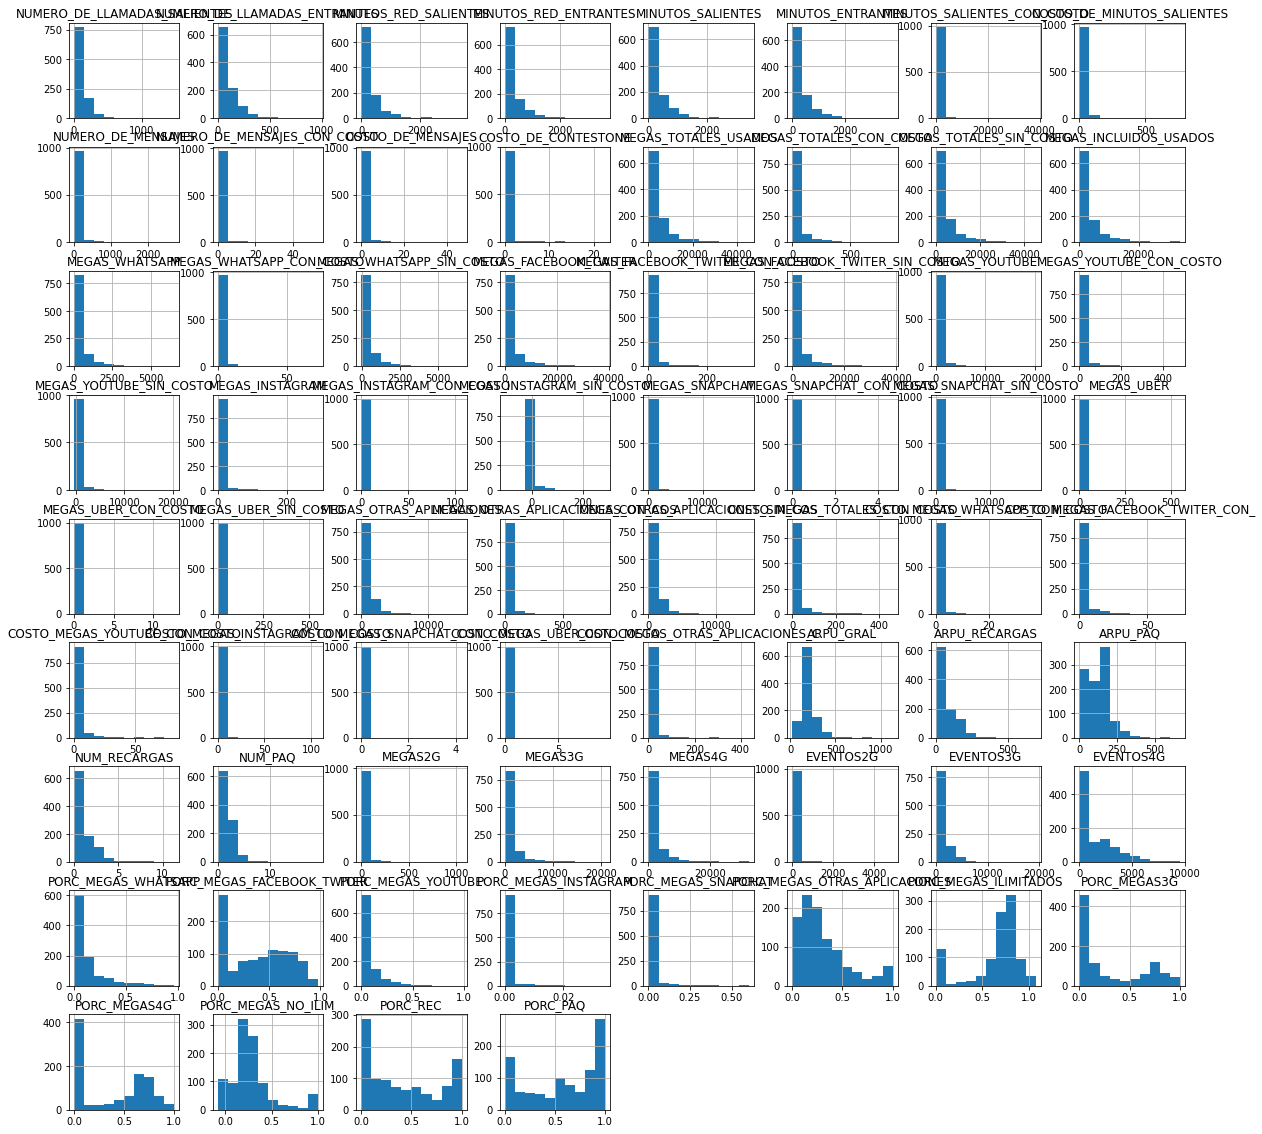

In [15]:
Xi[varc].sample(1000).hist(figsize=(20,20))

In [19]:
Xi=Xi.dropna()
Xi.reset_index(drop=True,inplace=True)

## Análisis Exploratorio

### Multicolinealidad

In [20]:
vc = VarClusHi(df=Xi,feat_list=varc)
vc.varclus()
rs = vc.rsquare
rs = rs.sort_values(by=['Cluster','RS_Ratio']).reset_index(drop=True)
rs['id'] = rs.groupby('Cluster').cumcount()+1
best = rs.loc[rs['id']==1]['Variable'].tolist()
best

['MEGAS_TOTALES_SIN_COSTO',
 'PORC_REC',
 'MINUTOS_ENTRANTES',
 'PORC_MEGAS4G',
 'COSTO_MEGAS_TOTALES_CON_COSTO',
 'MEGAS_INSTAGRAM',
 'MEGAS_WHATSAPP',
 'MEGAS_SNAPCHAT',
 'MEGAS_UBER_SIN_COSTO',
 'COSTO_DE_MENSAJES',
 'COSTO_MEGAS_SNAPCHAT_CON_COSTO',
 'MEGAS_YOUTUBE',
 'COSTO_MEGAS_UBER_CON_COSTO',
 'COSTO_MEGAS_WHATSAPP_CON_COSTO',
 'COSTO_MEGAS_INSTAGRAM_CON_COSTO',
 'MEGAS_OTRAS_APLICACIONES',
 'PORC_MEGAS_NO_ILIM',
 'EVENTOS2G',
 'MINUTOS_SALIENTES_CON_COSTO',
 'MEGAS_TOTALES_CON_COSTO',
 'EVENTOS3G',
 'PORC_MEGAS_FACEBOOK_TWITER',
 'NUM_PAQ',
 'PORC_MEGAS_YOUTUBE']

In [78]:
Xi[best].head()

,MEGAS_TOTALES_SIN_COSTO,PORC_REC,MINUTOS_ENTRANTES,PORC_MEGAS4G,COSTO_MEGAS_TOTALES_CON_COSTO,MEGAS_INSTAGRAM,MEGAS_WHATSAPP,MEGAS_SNAPCHAT,MEGAS_UBER_SIN_COSTO,COSTO_DE_MENSAJES,COSTO_MEGAS_SNAPCHAT_CON_COSTO,MEGAS_YOUTUBE,COSTO_MEGAS_UBER_CON_COSTO,COSTO_MEGAS_WHATSAPP_CON_COSTO,COSTO_MEGAS_INSTAGRAM_CON_COSTO,MEGAS_OTRAS_APLICACIONES,PORC_MEGAS_NO_ILIM,EVENTOS2G,MINUTOS_SALIENTES_CON_COSTO,MEGAS_TOTALES_CON_COSTO,EVENTOS3G,PORC_MEGAS_FACEBOOK_TWITER,NUM_PAQ,PORC_MEGAS_YOUTUBE
0,37.250113,0.937500,135.333333,0.767024,100.329767,0.0,7.227941,0.000000,0.0,4.25,0.0,7.211026,0.0,0.397967,0.0,137.607852,0.907477,1.000000,4273.333333,117.666667,78.333333,0.018526,0.333333,0.046548
1,1388.172428,0.571429,408.666667,0.000000,15.971400,0.0,108.664203,0.000000,0.0,1.70,0.0,122.513398,0.0,2.694433,0.0,263.082004,0.569958,48.000000,86.666667,18.666667,223.000000,0.648674,1.000000,0.087084
2,0.000000,0.666667,181.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,55.333333,0.000000,0.000000,0.000000,0.666667,0.000000
3,3287.962556,0.444444,1077.666667,0.721570,78.135933,0.0,1010.837283,0.001153,0.0,0.00,0.0,16.351920,0.0,0.106833,0.0,891.052467,0.233125,9.666667,23.666667,205.000000,516.666667,0.450826,1.666667,0.004681
4,17107.004460,1.000000,0.000000,0.745223,0.000000,0.0,864.015475,1.867260,0.0,0.00,0.0,1202.173630,0.0,0.000000,0.0,2440.807400,0.203523,15.000000,0.000000,0.000000,441.666667,0.736432,0.000000,0.070274


In [103]:
Xi.head()

,NLINEAID,NUMERO_DE_LLAMADAS_SALIENTES,NUMERO_DE_LLAMADAS_ENTRANTES,MINUTOS_RED_SALIENTES,MINUTOS_RED_ENTRANTES,MINUTOS_SALIENTES,MINUTOS_ENTRANTES,MINUTOS_SALIENTES_CON_COSTO,COSTO_DE_MINUTOS_SALIENTES,NUMERO_DE_MENSAJES,NUMERO_DE_MENSAJES_CON_COSTO,COSTO_DE_MENSAJES,COSTO_DE_CONTESTONE,MEGAS_TOTALES_USADOS,MEGAS_TOTALES_CON_COSTO,MEGAS_TOTALES_SIN_COSTO,MEGAS_INCLUIDOS_USADOS,MEGAS_WHATSAPP,MEGAS_WHATSAPP_CON_COSTO,MEGAS_WHATSAPP_SIN_COSTO,MEGAS_FACEBOOK_TWITER,MEGAS_FACEBOOK_TWITER_CON_COSTO,MEGAS_FACEBOOK_TWITER_SIN_COSTO,MEGAS_YOUTUBE,MEGAS_YOUTUBE_CON_COSTO,MEGAS_YOUTUBE_SIN_COSTO,MEGAS_INSTAGRAM,MEGAS_INSTAGRAM_CON_COSTO,MEGAS_INSTAGRAM_SIN_COSTO,MEGAS_SNAPCHAT,MEGAS_SNAPCHAT_CON_COSTO,MEGAS_SNAPCHAT_SIN_COSTO,MEGAS_UBER,MEGAS_UBER_CON_COSTO,MEGAS_UBER_SIN_COSTO,MEGAS_OTRAS_APLICACIONES,MEGAS_OTRAS_APLICACIONES_CON_COS,MEGAS_OTRAS_APLICACIONES_SIN_COS,COSTO_MEGAS_TOTALES_CON_COSTO,COSTO_MEGAS_WHATSAPP_CON_COSTO,COSTO_MEGAS_FACEBOOK_TWITER_CON_,COSTO_MEGAS_YOUTUBE_CON_COSTO,COSTO_MEGAS_INSTAGRAM_CON_COSTO,COSTO_MEGAS_SNAPCHAT_CON_COSTO,COSTO_MEGAS_UBER_CON_COSTO,COSTO_MEGAS_OTRAS_APLICACIONES_C,ARPU_GRAL,ARPU_RECARGAS,ARPU_PAQ,NUM_RECARGAS,NUM_PAQ,MEGAS2G,MEGAS3G,MEGAS4G,EVENTOS2G,EVENTOS3G,EVENTOS4G,PORC_MEGAS_WHATSAPP,PORC_MEGAS_FACEBOOK_TWITER,PORC_MEGAS_YOUTUBE,PORC_MEGAS_INSTAGRAM,PORC_MEGAS_SNAPCHAT,PORC_MEGAS_OTRAS_APLICACIONES,PORC_MEGAS_ILIMITADOS,PORC_MEGAS3G,PORC_MEGAS4G,CLUSTER,PORC_MEGAS_NO_ILIM,PORC_REC,PORC_PAQ
0,2211000727,43.000000,43.000000,77.666667,112.822222,78.333333,135.333333,4273.333333,71.113333,5.000000,5.0,4.25,0.0,154.916780,117.666667,37.250113,14.333333,7.227941,0.333333,6.894608,2.869961,1.000000,1.869961,7.211026,3.0,4.211026,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,137.607852,113.000000,24.607852,100.329767,0.397967,1.024667,2.711667,0.0,0.0,0.0,96.195467,193.333333,183.333333,10.000000,5.000000,0.333333,0.006710,9.967939,118.824839,1.000000,78.333333,601.666667,0.046657,0.018526,0.046548,0.0,0.000000e+00,0.888270,0.092523,0.064344,0.767024,6,0.907477,0.937500,0.062500
1,2211002252,11.333333,35.666667,64.700000,390.561111,64.666667,408.666667,86.666667,1.086667,3.333333,2.0,1.70,0.0,1406.839094,18.666667,1388.172428,605.000000,108.664203,3.000000,105.664203,912.579489,5.333333,907.246156,122.513398,0.0,122.513398,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,263.082004,10.000000,253.082004,15.971400,2.694433,4.744033,0.000000,0.0,0.0,0.0,8.532933,88.333333,13.333333,66.666667,1.333333,1.000000,16.621300,634.120338,0.000000,48.000000,223.000000,0.000000,0.077240,0.648674,0.087084,0.0,0.000000e+00,0.187002,0.430042,0.450741,0.000000,3,0.569958,0.571429,0.428571
2,2211003282,136.666667,109.666667,140.777778,117.877778,140.666667,181.000000,55.333333,0.693333,4.000000,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,200.000000,133.333333,66.666667,1.333333,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,5,0.000000,0.666667,0.333333
3,2211003408,421.333333,328.000000,857.266667,892.822222,959.666667,1077.666667,23.666667,0.636667,23.333333,0.0,0.00,0.0,3492.962556,205.000000,3287.962556,2678.666667,1010.837283,0.000000,1010.837283,1574.719734,14.666667,1560.053067,16.351920,143.0,-126.648080,0.0,0.0,0.0,0.001153,0.0,0.001153,0.0,0.0,0.0,891.052467,46.666667,844.385800,78.135933,0.106833,5.937533,42.834267,0.0,0.0,0.0,29.257300,205.000000,66.666667,133.333333,1.333333,1.666667,3.814229,358.779531,2520.418494,9.666667,516.666667,1722.000000,0.289393,0.450826,0.004681,0.0,3.299970e-07,0.255099,0.766875,0.102715,0.721570,2,0.233125,0.444444,0.555556
4,2211003575,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,17107.004460,0.000000,17107.004460,13625.3

In [99]:
Xi.filter(like='ILIM').head()

,PORC_MEGAS_ILIMITADOS,PORC_MEGAS_NO_ILIM
0,0.092523,0.907477
1,0.430042,0.569958
2,0.000000,0.000000
3,0.766875,0.233125
4,0.796477,0.203523


In [101]:
Xi.filter(like='COSTO').head()

,MINUTOS_SALIENTES_CON_COSTO,COSTO_DE_MINUTOS_SALIENTES,NUMERO_DE_MENSAJES_CON_COSTO,COSTO_DE_MENSAJES,COSTO_DE_CONTESTONE,MEGAS_TOTALES_CON_COSTO,MEGAS_TOTALES_SIN_COSTO,MEGAS_WHATSAPP_CON_COSTO,MEGAS_WHATSAPP_SIN_COSTO,MEGAS_FACEBOOK_TWITER_CON_COSTO,MEGAS_FACEBOOK_TWITER_SIN_COSTO,MEGAS_YOUTUBE_CON_COSTO,MEGAS_YOUTUBE_SIN_COSTO,MEGAS_INSTAGRAM_CON_COSTO,MEGAS_INSTAGRAM_SIN_COSTO,MEGAS_SNAPCHAT_CON_COSTO,MEGAS_SNAPCHAT_SIN_COSTO,MEGAS_UBER_CON_COSTO,MEGAS_UBER_SIN_COSTO,COSTO_MEGAS_TOTALES_CON_COSTO,COSTO_MEGAS_WHATSAPP_CON_COSTO,COSTO_MEGAS_FACEBOOK_TWITER_CON_,COSTO_MEGAS_YOUTUBE_CON_COSTO,COSTO_MEGAS_INSTAGRAM_CON_COSTO,COSTO_MEGAS_SNAPCHAT_CON_COSTO,COSTO_MEGAS_UBER_CON_COSTO,COSTO_MEGAS_OTRAS_APLICACIONES_C
0,4273.333333,71.113333,5.0,4.25,0.0,117.666667,37.250113,0.333333,6.894608,1.000000,1.869961,3.0,4.211026,0.0,0.0,0.0,0.000000,0.0,0.0,100.329767,0.397967,1.024667,2.711667,0.0,0.0,0.0,96.195467
1,86.666667,1.086667,2.0,1.70,0.0,18.666667,1388.172428,3.000000,105.664203,5.333333,907.246156,0.0,122.513398,0.0,0.0,0.0,0.000000,0.0,0.0,15.971400,2.694433,4.744033,0.000000,0.0,0.0,0.0,8.532933
2,55.333333,0.693333,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,23.666667,0.636667,0.0,0.00,0.0,205.000000,3287.962556,0.000000,1010.837283,14.666667,1560.053067,143.0,-126.648080,0.0,0.0,0.0,0.001153,0.0,0.0,78.135933,0.106833,5.937533,42.834267,0.0,0.0,0.0,29.257300
4,0.000000,0.000000,0.0,0.00,0.0,0.000000,17107.004460,0.000000,864.015475,0.000000,12598.140690,0.0,1202.173630,0.0,0.0,0.0,1.867260,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [88]:
Xi[['PORC_PAQ','PORC_REC','ARPU_RECARGAS','NUM_RECARGAS']].head()

,PORC_PAQ,PORC_REC,ARPU_RECARGAS,NUM_RECARGAS
0,0.062500,0.937500,183.333333,5.000000
1,0.428571,0.571429,13.333333,1.333333
2,0.333333,0.666667,133.333333,1.333333
3,0.555556,0.444444,66.666667,1.333333
4,0.000000,1.000000,200.000000,2.000000


0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
491477    1.0
491478    1.0
491479    1.0
491480    1.0
491481    1.0
Length: 491482, dtype: float64

In [22]:
rs.style.background_gradient('PuBu')

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio,id
0,0,MEGAS_TOTALES_SIN_COSTO,0.978804,0.405907,0.035678,1
1,0,MEGAS_TOTALES_USADOS,0.978390,0.409013,0.036566,2
2,0,MEGAS_INCLUIDOS_USADOS,0.974368,0.390532,0.042056,3
3,0,MEGAS_FACEBOOK_TWITER_SIN_COSTO,0.940779,0.268977,0.081011,4
4,0,MEGAS_FACEBOOK_TWITER,0.940701,0.271565,0.081406,5
5,0,MEGAS4G,0.797341,0.306286,0.292136,6
6,1,PORC_REC,0.895525,0.532248,0.223356,1
7,1,ARPU_RECARGAS,0.786538,0.187456,0.262708,2
8,1,PORC_PAQ,0.882167,0.554185,0.264309,3
9,1,NUM_RECARGAS,0.671382,0.087934,0.360301,4


array([[<AxesSubplot:title={'center':'MEGAS_TOTALES_SIN_COSTO'}>,
        <AxesSubplot:title={'center':'PORC_REC'}>,
        <AxesSubplot:title={'center':'MINUTOS_ENTRANTES'}>,
        <AxesSubplot:title={'center':'PORC_MEGAS4G'}>,
        <AxesSubplot:title={'center':'COSTO_MEGAS_TOTALES_CON_COSTO'}>],
       [<AxesSubplot:title={'center':'MEGAS_INSTAGRAM'}>,
        <AxesSubplot:title={'center':'MEGAS_WHATSAPP'}>,
        <AxesSubplot:title={'center':'MEGAS_SNAPCHAT'}>,
        <AxesSubplot:title={'center':'MEGAS_UBER_SIN_COSTO'}>,
        <AxesSubplot:title={'center':'COSTO_DE_MENSAJES'}>],
       [<AxesSubplot:title={'center':'COSTO_MEGAS_SNAPCHAT_CON_COSTO'}>,
        <AxesSubplot:title={'center':'MEGAS_YOUTUBE'}>,
        <AxesSubplot:title={'center':'COSTO_MEGAS_UBER_CON_COSTO'}>,
        <AxesSubplot:title={'center':'COSTO_MEGAS_WHATSAPP_CON_COSTO'}>,
        <AxesSubplot:title={'center':'COSTO_MEGAS_INSTAGRAM_CON_COSTO'}>],
       [<AxesSubplot:title={'center':'MEGAS_OTRAS_APL

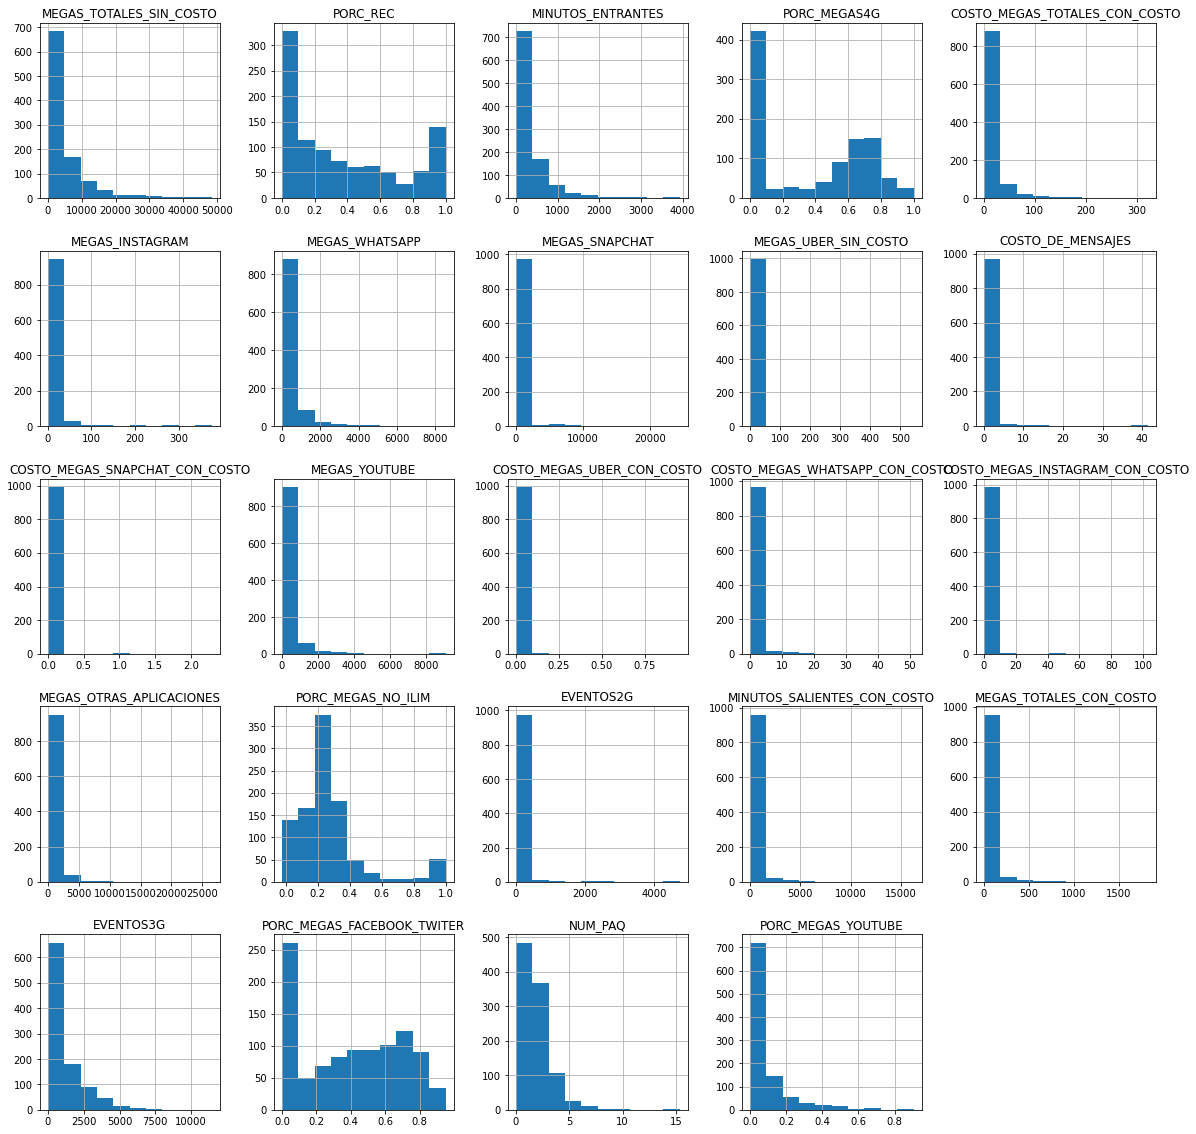

In [23]:
Xi[best].sample(1000).hist(figsize=(20,20))

In [24]:
from sklearn.feature_selection import SelectKBest

In [25]:
sk = SelectKBest(k=len(best))

In [27]:
sk.fit(Xi[best],Xi[vart[0]])

SelectKBest(k=24)

In [28]:
scores = pd.DataFrame(zip(best,sk.scores_),columns=['variable','score'])
scores = scores.sort_values(by='score',ascending=False)
scores

,variable,score
3,PORC_MEGAS4G,467044.430926
21,PORC_MEGAS_FACEBOOK_TWITER,291135.005091
20,EVENTOS3G,48432.898918
12,COSTO_MEGAS_UBER_CON_COSTO,45890.170839
16,PORC_MEGAS_NO_ILIM,44121.467771
0,MEGAS_TOTALES_SIN_COSTO,20735.184767
10,COSTO_MEGAS_SNAPCHAT_CON_COSTO,16100.222439
15,MEGAS_OTRAS_APLICACIONES,10143.321956
23,PORC_MEGAS_YOUTUBE,8988.521127
18,MINUTOS_SALIENTES_CON_COSTO,8607.167361


In [29]:
Xi.head()

,NLINEAID,NUMERO_DE_LLAMADAS_SALIENTES,NUMERO_DE_LLAMADAS_ENTRANTES,MINUTOS_RED_SALIENTES,MINUTOS_RED_ENTRANTES,MINUTOS_SALIENTES,MINUTOS_ENTRANTES,MINUTOS_SALIENTES_CON_COSTO,COSTO_DE_MINUTOS_SALIENTES,NUMERO_DE_MENSAJES,...,PORC_MEGAS_INSTAGRAM,PORC_MEGAS_SNAPCHAT,PORC_MEGAS_OTRAS_APLICACIONES,PORC_MEGAS_ILIMITADOS,PORC_MEGAS3G,PORC_MEGAS4G,CLUSTER,PORC_MEGAS_NO_ILIM,PORC_REC,PORC_PAQ
0,2211000727,43.000000,43.000000,77.666667,112.822222,78.333333,135.333333,4273.333333,71.113333,5.000000,...,0.0,0.000000e+00,0.888270,0.092523,0.064344,0.767024,6,0.907477,0.937500,0.062500
1,2211002252,11.333333,35.666667,64.700000,390.561111,64.666667,408.666667,86.666667,1.086667,3.333333,...,0.0,0.000000e+00,0.187002,0.430042,0.450741,0.000000,3,0.569958,0.571429,0.428571
2,2211003282,136.666667,109.666667,140.777778,117.877778,140.666667,181.000000,55.333333,0.693333,4.000000,...,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,5,0.000000,0.666667,0.333333
3,2211003408,421.333333,328.000000,857.266667,892.822222,959.666667,1077.666667,23.666667,0.636667,23.333333,...,0.0,3.299970e-07,0.255099,0.766875,0.102715,0.721570,2,0.233125,0.444444,0.555556
4,2211003575,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.091520e-04,0.142679,0.796477,0.049366,0.745223,1,0.203523,1.000000,0.000000


In [30]:
Xi.shape

(491482, 70)

# Preprocesamiento

In [31]:
import numpy as np
import pandas as pd

from datetime import date
from dateutil.relativedelta import relativedelta as rd

import os
import pickle
import json

import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

from functools import reduce

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_auc_score, roc_curve
from scikitplot.metrics import plot_ks_statistic,plot_roc_curve, confusion_matrix,plot_roc, plot_confusion_matrix

from sklearn.model_selection import train_test_split,RandomizedSearchCV

from varclushi import VarClusHi

cf.go_offline()
pd.set_option('display.max_columns',None)

## Escalamiento de Variables

In [32]:
sc = StandardScaler()

In [38]:
avr=pd.DataFrame(sc.fit_transform(Xi[varc]),columns=varc)

In [41]:
X=pd.concat([Xi[um],avr,Xi[vart]],axis=1)

In [42]:
X['tgt']=X[vart[0]].astype(str)

In [43]:
X

,NLINEAID,NUMERO_DE_LLAMADAS_SALIENTES,NUMERO_DE_LLAMADAS_ENTRANTES,MINUTOS_RED_SALIENTES,MINUTOS_RED_ENTRANTES,MINUTOS_SALIENTES,MINUTOS_ENTRANTES,MINUTOS_SALIENTES_CON_COSTO,COSTO_DE_MINUTOS_SALIENTES,NUMERO_DE_MENSAJES,NUMERO_DE_MENSAJES_CON_COSTO,COSTO_DE_MENSAJES,COSTO_DE_CONTESTONE,MEGAS_TOTALES_USADOS,MEGAS_TOTALES_CON_COSTO,MEGAS_TOTALES_SIN_COSTO,MEGAS_INCLUIDOS_USADOS,MEGAS_WHATSAPP,MEGAS_WHATSAPP_CON_COSTO,MEGAS_WHATSAPP_SIN_COSTO,MEGAS_FACEBOOK_TWITER,MEGAS_FACEBOOK_TWITER_CON_COSTO,MEGAS_FACEBOOK_TWITER_SIN_COSTO,MEGAS_YOUTUBE,MEGAS_YOUTUBE_CON_COSTO,MEGAS_YOUTUBE_SIN_COSTO,MEGAS_INSTAGRAM,MEGAS_INSTAGRAM_CON_COSTO,MEGAS_INSTAGRAM_SIN_COSTO,MEGAS_SNAPCHAT,MEGAS_SNAPCHAT_CON_COSTO,MEGAS_SNAPCHAT_SIN_COSTO,MEGAS_UBER,MEGAS_UBER_CON_COSTO,MEGAS_UBER_SIN_COSTO,MEGAS_OTRAS_APLICACIONES,MEGAS_OTRAS_APLICACIONES_CON_COS,MEGAS_OTRAS_APLICACIONES_SIN_COS,COSTO_MEGAS_TOTALES_CON_COSTO,COSTO_MEGAS_WHATSAPP_CON_COSTO,COSTO_MEGAS_FACEBOOK_TWITER_CON_,COSTO_MEGAS_YOUTUBE_CON_COSTO,COSTO_MEGAS_INSTAGRAM_CON_COSTO,COSTO_MEGAS_SNAPCHAT_CON_COSTO,COSTO_MEGAS_UBER_CON_COSTO,COSTO_MEGAS_OTRAS_APLICACIONES_C,ARPU_GRAL,ARPU_RECARGAS,ARPU_PAQ,NUM_RECARGAS,NUM_PAQ,MEGAS2G,MEGAS3G,MEGAS4G,EVENTOS2G,EVENTOS3G,EVENTOS4G,PORC_MEGAS_WHATSAPP,PORC_MEGAS_FACEBOOK_TWITER,PORC_MEGAS_YOUTUBE,PORC_MEGAS_INSTAGRAM,PORC_MEGAS_SNAPCHAT,PORC_MEGAS_OTRAS_APLICACIONES,PORC_MEGAS_ILIMITADOS,PORC_MEGAS3G,PORC_MEGAS4G,PORC_MEGAS_NO_ILIM,PORC_REC,PORC_PAQ,CLUSTER,tgt
0,2211000727,-0.544947,-0.509751,-0.551191,-0.452907,-0.581369,-0.489442,3.923205,2.253741,-0.191512,1.324621,1.103197,-0.190543,-0.669372,0.832846,-0.683163,-0.672537,-0.610179,-0.102091,-0.609051,-0.535663,-0.232303,-0.534865,-0.389193,-0.140173,-0.382685,-0.192043,-0.093139,-0.172748,-0.186914,-0.047138,-0.186909,-0.078821,-0.047102,-0.078398,-0.698920,1.389868,-0.802202,2.317498,-0.070421,-0.182272,0.032508,-0.078642,-0.044117,-0.063683,3.133290,-0.144583,1.522338,-1.387560,2.797221,-0.933878,-0.169123,-0.495445,-0.482620,-0.166568,-0.785236,-0.483746,-0.462079,-1.276955,-0.307295,-0.24664,-0.321680,2.313952,-2.114053,-0.786621,1.149432,2.784425,1.594704,-1.574791,6,6
1,2211002252,-0.831406,-0.583682,-0.583717,0.334542,-0.614409,0.218079,-0.201531,-0.245864,-0.198071,0.420100,0.335122,-0.190543,-0.486134,-0.177580,-0.484899,-0.564130,-0.438288,0.357893,-0.441713,-0.363172,-0.097655,-0.362997,-0.257110,-0.216155,-0.247225,-0.192043,-0.093139,-0.172748,-0.186914,-0.047138,-0.186909,-0.078821,-0.047102,-0.078398,-0.584586,-0.106337,-0.589749,0.050499,0.627473,0.342990,-0.236080,-0.078642,-0.044117,-0.063683,0.006949,-1.240778,-0.690377,-0.736303,0.207091,-0.476645,0.026136,-0.259475,-0.508412,-0.043083,-0.676622,-0.814656,-0.274487,0.878230,0.026068,-0.24664,-0.321680,-0.512565,-0.879016,0.373204,-1.081952,1.304055,0.562133,-0.546868,3,3
2,2211003282,0.302370,0.162346,-0.392884,-0.438574,-0.430677,-0.371234,-0.232400,-0.259904,-0.195448,-0.182913,-0.176927,-0.190543,-0.692047,-0.368097,-0.688630,-0.675168,-0.622428,-0.159589,-0.620732,-0.536208,-0.263376,-0.535220,-0.397454,-0.216155,-0.387507,-0.192043,-0.093139,-0.172748,-0.186914,-0.047138,-0.186909,-0.078821,-0.047102,-0.078398,-0.824311,-0.251600,-0.825084,-0.378707,-0.191362,-0.326979,-0.236080,-0.078642,-0.044117,-0.063683,-0.297364,-0.074984,0.871539,-0.736303,0.207091,-0.705261,-0.169201,-0.499214,-0.508412,-0.169195,-0.844048,-0.814656,-0.748264,-1.340316,-0.690095,-0.24664,-0.321680,-1.266293,-2.452608,-0.979757,-1.081952,-1.195798,0.830770,-0.814295,5,5
3,2211003408,2.877489,2.363465,1.404348,1.758560,1.549273,1.949781,-0.263599,-0.261927,-0.119369,-0.182913,-0.176927,-0.190543,-0.180798,1.724198,-0.206081,-0.183541,1.090512,-0.159589,1.091855,-0.237623,0.192355,-0.239073,-0.378722,3.405650,-0.532524,-0.192043,-0.093139,-0.172748,-0.186913,-0.047138,-0.186908,-0.078821,-0.047102,-0.078398,-0.012368,0.426293,-0.039909,1.721073,-0.158896,0.511540,4.006598,-0.078642,-0.044117,-0.063683,0.746050,-0.022784,0.003808,0.029881,0.207091,-0.0

## Análisis de Componentes Principales (Visualización)

In [46]:
pi_pca = PCA()
pi_pca.fit(X[best])
Xp = pd.DataFrame(pi_pca.transform(X[best]),columns=[f'd%i'%(i+1) for i in range(len(best))])
Xp[um] = Xi[um]
Xp[vart] = Xi[vart]
Xp[vart[0]]=Xp[vart[0]].astype(str)
Xp.head()

,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,d18,d19,d20,d21,d22,d23,d24,NLINEAID,CLUSTER
0,-3.560721,3.556631,-0.435800,0.326946,0.736356,-0.140144,2.032403,0.551025,-0.107716,0.391913,0.494689,-0.285687,-0.201057,-0.556716,-1.260283,0.018159,0.738764,-1.457740,-0.563618,-1.503850,-0.284523,-0.207201,0.852432,0.439414,2211000727,6
1,-1.330631,0.192575,0.162558,-0.154024,0.450100,-0.099374,-0.242695,-0.145250,-0.019401,0.335410,0.661149,0.035845,-0.565295,-0.428405,-0.451418,-0.350393,-1.025350,0.019555,-0.251180,0.762674,0.138794,-0.013847,-0.659172,-0.719626,2211002252,3
2,-1.805178,-0.610371,-0.694991,0.489309,-0.009418,-0.022413,-0.624677,-0.227107,-0.094123,-0.677063,-0.596687,-0.168779,0.082841,0.251034,0.580076,0.377329,0.789374,0.815281,0.286224,0.851006,0.841874,0.205085,-0.145416,0.259365,2211003282,5
3,0.496395,1.333158,-0.549768,-1.640275,-0.483911,-1.182247,1.060560,0.372340,-0.581428,0.218559,-1.123680,1.237572,-0.392573,-0.350234,-0.057365,0.236275,-0.151485,0.686023,-0.936121,-0.262029,0.437126,-0.156987,0.215077,-0.020987,2211003408,2
4,1.685005,1.329716,-1.568115,1.332444,0.399232,-1.298123,-1.151436,0.013374,0.203074,0.539725,0.134135,-0.183391,1.055576,0.220953,-0.667681,-0.448974,-0.305337,-0.604756,0.401113,0.393990,0.263092,0.658650,-0.347940,0.072016,2211003575,1


In [47]:
pi_pca.explained_variance_ratio_.cumsum() ##Varianza explicada por los componentes

array([0.13174876, 0.22056398, 0.29359321, 0.35148878, 0.40609368,
       0.45345287, 0.4992079 , 0.54406902, 0.58805348, 0.62787119,
       0.66746398, 0.70562977, 0.74184961, 0.77761065, 0.81188407,
       0.84460157, 0.87608046, 0.905692  , 0.92858155, 0.9476926 ,
       0.96466732, 0.97946633, 0.99233493, 1.        ])

C:\Users\VDMG015\Anaconda3\lib\site-packages\cufflinks\plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\VDMG015\Anaconda3\lib\site-packages\cufflinks\plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



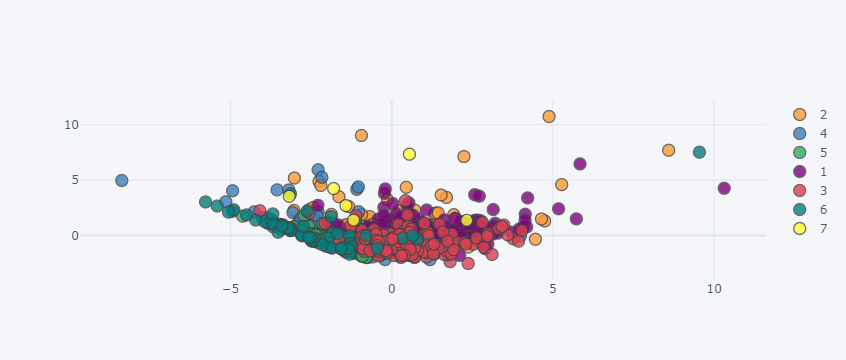

In [48]:
Xp.sample(1000).iplot(kind='scatter',x='d1',y='d2',categories=vart[0],mode='markers')

In [50]:
Xp['CLUSTER'].value_counts(True)

1    0.298353
2    0.210645
3    0.209241
4    0.151562
5    0.065007
6    0.056262
7    0.008930
Name: CLUSTER, dtype: float64

## Partición de datos

In [51]:
Xt,Xv,yt,yv = train_test_split(X[um+varc],X[um+vart],train_size=0.75)

In [52]:
Xt.reset_index(drop=True,inplace=True)
Xv.reset_index(drop=True,inplace=True)
yt.reset_index(drop=True,inplace=True)
yv.reset_index(drop=True,inplace=True)

# Modelado

## Regresión Logística

In [53]:
modelo = LogisticRegression()

In [96]:
modelo.fit(Xt[best].drop(['MINUTOS_SALIENTES_CON_COSTO','COSTO_DE_MENSAJES','PORC_MEGAS_NO_ILIM'],axis=1),yt[vart[0]])

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

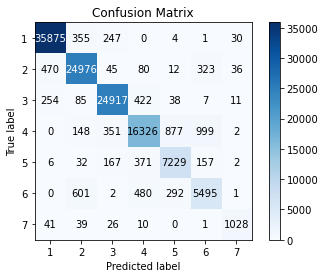

In [102]:
plot_confusion_matrix(yv[vart[0]],modelo.predict(Xv[best].drop(['MINUTOS_SALIENTES_CON_COSTO','COSTO_DE_MENSAJES'],axis=1)), normalize=False)

In [58]:
best

['MEGAS_TOTALES_SIN_COSTO',
 'PORC_REC',
 'MINUTOS_ENTRANTES',
 'PORC_MEGAS4G',
 'COSTO_MEGAS_TOTALES_CON_COSTO',
 'MEGAS_INSTAGRAM',
 'MEGAS_WHATSAPP',
 'MEGAS_SNAPCHAT',
 'MEGAS_UBER_SIN_COSTO',
 'COSTO_DE_MENSAJES',
 'COSTO_MEGAS_SNAPCHAT_CON_COSTO',
 'MEGAS_YOUTUBE',
 'COSTO_MEGAS_UBER_CON_COSTO',
 'COSTO_MEGAS_WHATSAPP_CON_COSTO',
 'COSTO_MEGAS_INSTAGRAM_CON_COSTO',
 'MEGAS_OTRAS_APLICACIONES',
 'PORC_MEGAS_NO_ILIM',
 'EVENTOS2G',
 'MINUTOS_SALIENTES_CON_COSTO',
 'MEGAS_TOTALES_CON_COSTO',
 'EVENTOS3G',
 'PORC_MEGAS_FACEBOOK_TWITER',
 'NUM_PAQ',
 'PORC_MEGAS_YOUTUBE']

In [69]:
modelo.coef_[0]

array([ 5.68224518, -0.03284034,  0.04406251,  6.22743044, -0.0324011 ,
        0.11367027,  0.37786917,  0.2447228 ,  0.04009192, -0.0430804 ,
        0.20634237, -0.82993517,  1.06235701,  0.02023753,  0.09688346,
       -1.36260143,  1.11193672,  0.16263832, -0.13824505,  0.15543408,
        1.67560931,  9.49359705,  0.0951698 ,  0.90171457])

### Parámetros

In [73]:
pd.DataFrame([best,modelo.coef_[0]]).T.sort_values(by=1,ascending=False)

,0,1
21,PORC_MEGAS_FACEBOOK_TWITER,9.493597
3,PORC_MEGAS4G,6.22743
0,MEGAS_TOTALES_SIN_COSTO,5.682245
20,EVENTOS3G,1.675609
16,PORC_MEGAS_NO_ILIM,1.111937
12,COSTO_MEGAS_UBER_CON_COSTO,1.062357
23,PORC_MEGAS_YOUTUBE,0.901715
6,MEGAS_WHATSAPP,0.377869
7,MEGAS_SNAPCHAT,0.244723
10,COSTO_MEGAS_SNAPCHAT_CON_COSTO,0.206342


In [74]:
pd.DataFrame([best,modelo.coef_[1]]).T.sort_values(by=1,ascending=False)

,0,1
3,PORC_MEGAS4G,5.388852
7,MEGAS_SNAPCHAT,2.817196
15,MEGAS_OTRAS_APLICACIONES,2.11631
6,MEGAS_WHATSAPP,1.890211
11,MEGAS_YOUTUBE,1.031859
20,EVENTOS3G,0.905278
16,PORC_MEGAS_NO_ILIM,0.557532
17,EVENTOS2G,0.287501
23,PORC_MEGAS_YOUTUBE,0.108733
5,MEGAS_INSTAGRAM,0.068308


In [75]:
pd.DataFrame([best,modelo.coef_[2]]).T.sort_values(by=1,ascending=False)

,0,1
21,PORC_MEGAS_FACEBOOK_TWITER,6.440404
0,MEGAS_TOTALES_SIN_COSTO,6.123309
20,EVENTOS3G,2.156934
23,PORC_MEGAS_YOUTUBE,0.650165
12,COSTO_MEGAS_UBER_CON_COSTO,0.327543
19,MEGAS_TOTALES_CON_COSTO,0.309646
6,MEGAS_WHATSAPP,0.276222
4,COSTO_MEGAS_TOTALES_CON_COSTO,0.233204
14,COSTO_MEGAS_INSTAGRAM_CON_COSTO,0.083092
1,PORC_REC,0.064901


In [76]:
pd.DataFrame([best,modelo.coef_[3]]).T.sort_values(by=1,ascending=False)

,0,1
15,MEGAS_OTRAS_APLICACIONES,3.233186
7,MEGAS_SNAPCHAT,2.445267
6,MEGAS_WHATSAPP,2.067881
20,EVENTOS3G,1.93138
11,MEGAS_YOUTUBE,1.63789
4,COSTO_MEGAS_TOTALES_CON_COSTO,0.305622
5,MEGAS_INSTAGRAM,0.09387
1,PORC_REC,0.058371
8,MEGAS_UBER_SIN_COSTO,0.033076
9,COSTO_DE_MENSAJES,0.010699


### Intercepto

In [127]:
modelo.intercept_

array([-1.19240913])

In [120]:
lr = LogisticRegression(fit_intercept=False)

In [121]:
import seaborn as sns
sns.set_theme(style="ticks")

In [122]:
lr.fit(Xt[best],yt[vart[0]])

LogisticRegression(fit_intercept=False)

In [123]:
pd.DataFrame([best,lr.coef_[0]]).T.sort_values(by=1)

,0,1
11,x_monto_recargado_4,-0.169845
26,x_min_monto_4,-0.124082
20,x_max_monto_4,-0.111864
21,x_prom_llamadas_in_4,-0.074764
5,x_prom_connections_2,-0.072731
9,x_prom_uplink_2,-0.033627
17,x_min_cv_sms_out_4,-0.022894
28,x_cv_propmb_otros_4,-0.010261
16,x_prom_mb_otros_2,-0.006298
6,x_prom_segundos_out_2,-0.005181


In [124]:
lr.intercept_

array([0.])

In [156]:
best

['x_prom_mb_inc_4',
 'x_prom_llamadas_out_4',
 'x_prom_sms_in_2',
 'x_prom_propmb_otros_4',
 'x_prom_recargas_2',
 'x_prom_connections_2',
 'x_prom_segundos_out_2',
 'x_cv_conmb_tot_4',
 'x_cv_segundos_in_2',
 'x_prom_uplink_2',
 'x_max_cv_downlink_2',
 'x_monto_recargado_4',
 'x_prom_sms_out_2',
 'x_cv_monto_2',
 'x_prom_segundos_in_2',
 'x_max_cv_segundos_in_2',
 'x_prom_mb_otros_2',
 'x_min_cv_sms_out_4',
 'x_min_cv_segundos_out_2',
 'x_max_cv_connections_2',
 'x_max_monto_4',
 'x_prom_llamadas_in_4',
 'x_max_cv_sms_out_2',
 'x_min_cv_sms_in_2',
 'x_cv_sms_in_2',
 'x_cv_conmb_tot_2',
 'x_min_monto_4',
 'x_cv_segundos_out_2',
 'x_cv_propmb_otros_4',
 'x_max_cv_uplink_2',
 'x_cv_propmb_otros_2']

### Área bajo la curva ROC

### Estadístico de KS

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

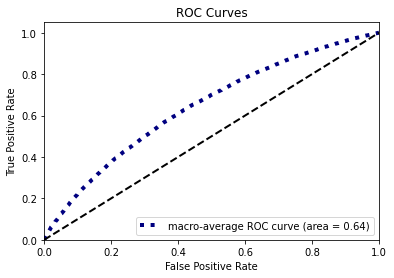

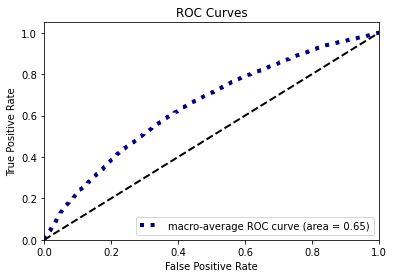

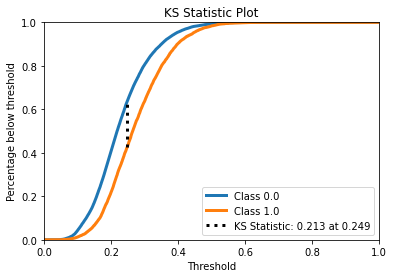

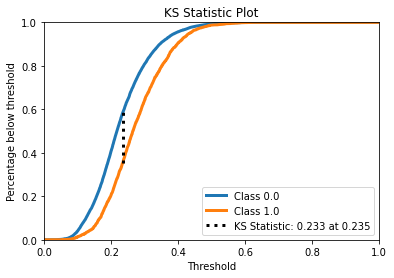

In [119]:
plot_roc_curve(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[vart[0]],curves='macro')
plot_roc_curve(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[vart[0]],curves='macro')

plot_ks_statistic(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[vart[0]])
plot_ks_statistic(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[vart[0]])

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

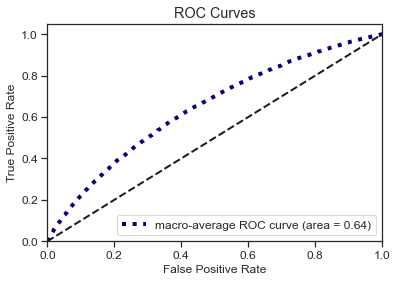

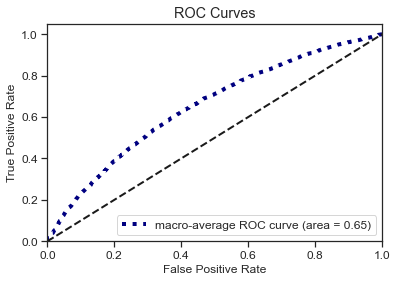

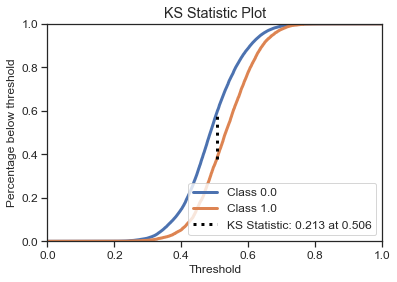

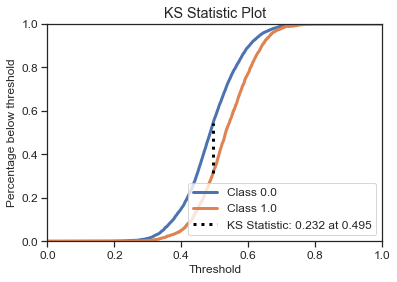

In [125]:
plot_roc_curve(y_probas=lr.predict_proba(Xt[best]),y_true=yt[vart[0]],curves='macro')
plot_roc_curve(y_probas=lr.predict_proba(Xv[best]),y_true=yv[vart[0]],curves='macro')

plot_ks_statistic(y_probas=lr.predict_proba(Xt[best]),y_true=yt[vart[0]])
plot_ks_statistic(y_probas=lr.predict_proba(Xv[best]),y_true=yv[vart[0]])

In [126]:
confusion_matrix(yv[vart[0]],lr.predict(Xv[best]))

array([[3978, 3039],
       [ 752, 1472]], dtype=int64)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

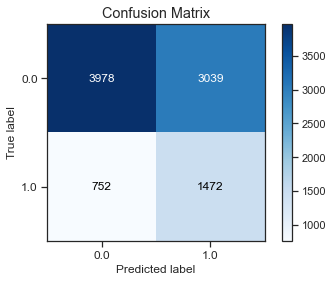

In [127]:
plot_confusion_matrix(yv[vart[0]],lr.predict(Xv[best]), normalize=False)

In [128]:
aux=pd.DataFrame(modelo.predict_proba(Xv[best]))

<AxesSubplot:>

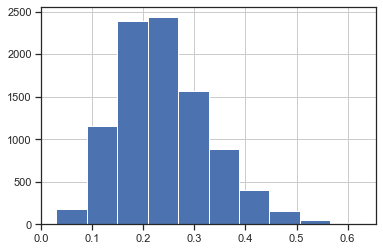

In [135]:
aux[1].hist()

In [137]:
confusion_matrix(yv[vart[0]],modelo.predict(Xv[best]))

array([[6967,   50],
       [2197,   27]], dtype=int64)

## Máquina Vector Soporte

In [198]:
modelo = SVC(probability=True)

In [199]:
%%time
modelo.fit(Xt[best],yt[vart[0]])

Wall time: 31min 11s


SVC(probability=True)

### Área bajo la curva ROC

### Estadístico de KS bajo diferentes puntos de corte de probabilidad

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

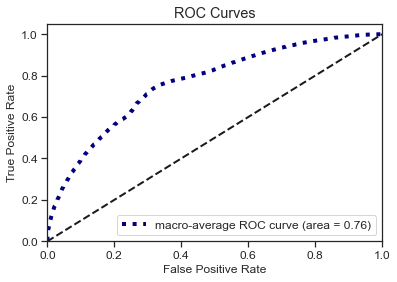

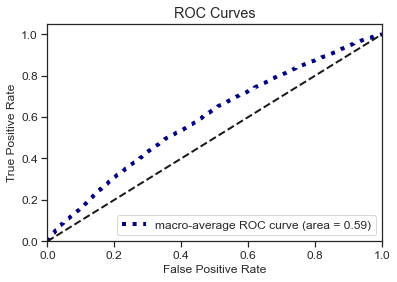

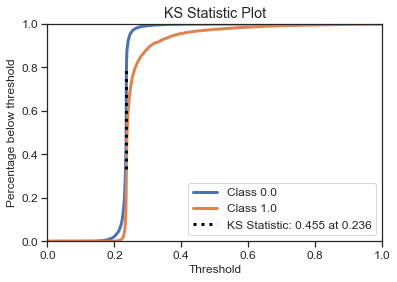

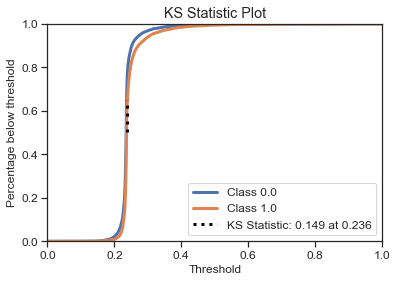

In [200]:
plot_roc_curve(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[vart[0]],curves='macro')
plot_roc_curve(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[vart[0]],curves='macro')

plot_ks_statistic(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[vart[0]])
plot_ks_statistic(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[vart[0]])

## Red Neuronal

In [104]:
modelo = MLPClassifier()

In [107]:
%%time
modelo.fit(Xt[best],yt[vart[0]])

Wall time: 47.5 s


C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPClassifier()

### Desempeño y Sobreajuste

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

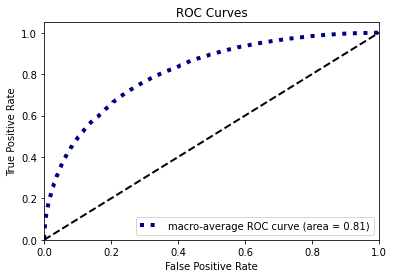

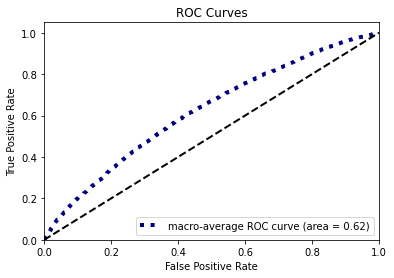

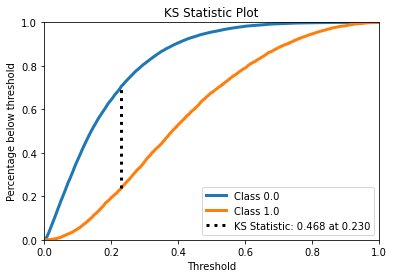

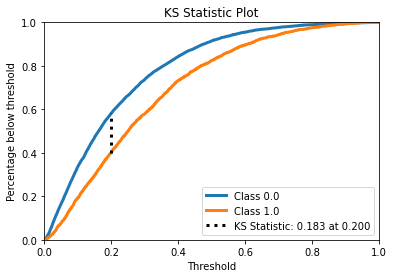

In [108]:
plot_roc_curve(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[vart[0]],curves='macro')
plot_roc_curve(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[vart[0]],curves='macro')

plot_ks_statistic(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[vart[0]])
plot_ks_statistic(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[vart[0]])

### Tunning

In [109]:
gradilla_hp = dict(hidden_layer_sizes = [(a,b,c,) for a in range(10,100,10) for b in range(10,100,10) for c in range(10,100,10)] ,
activation = ['identity', 'logistic', 'tanh', 'relu'],
learning_rate = ['constant', 'invscaling', 'adaptive'],
max_iter=[1000])

grid = RandomizedSearchCV(cv=3,verbose=True,
                          estimator=modelo,
                          n_jobs=-1,
                          scoring='roc_auc',
                          param_distributions=gradilla_hp,
                          n_iter=3)

grid.fit(Xt[best],yt[vart[0]])

modelo = grid.best_estimator_
modelo

grid.best_params_

grid.best_score_

modelo.fit(Xt[best],yt[vart[0]])

Fitting 3 folds for each of 3 candidates, totalling 9 fits


KeyboardInterrupt: 

In [152]:

grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [ ]:
plot_roc_curve(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[vart[0]],curves='macro')
plot_roc_curve(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[vart[0]],curves='macro')

plot_ks_statistic(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[vart[0]])
plot_ks_statistic(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[vart[0]])

## XGBoost

In [110]:
from xgboost.sklearn import XGBClassifier
modelo = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [114]:
%%time
modelo.fit(Xt[varc], yt[vart[0]])

C:\Users\VDMG015\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[15:46:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 3min 54s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [115]:
from sklearn.metrics import confusion_matrix, accuracy_score
yp = modelo.predict(Xv[varc])
cm = confusion_matrix(yv[vart[0]], yp)
print(cm)
accuracy_score(yv[vart[0]], yp)

[[6706  311]
 [1821  403]]


0.7692890379829023

### Área bajo la curva ROC

### Estadístico de KS

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

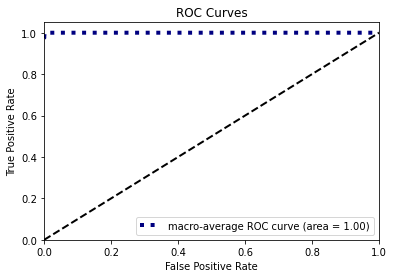

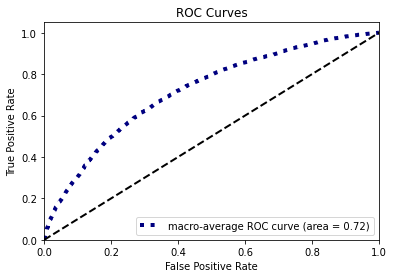

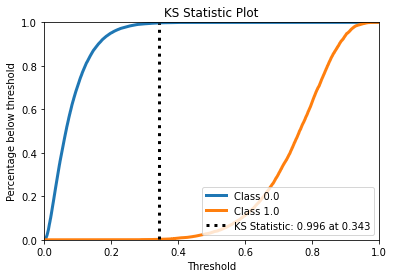

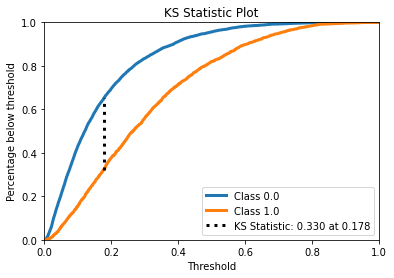

In [116]:
plot_roc_curve(y_probas=modelo.predict_proba(Xt[varc]),y_true=yt[vart[0]],curves='macro')
plot_roc_curve(y_probas=modelo.predict_proba(Xv[varc]),y_true=yv[vart[0]],curves='macro')

plot_ks_statistic(y_probas=modelo.predict_proba(Xt[varc]),y_true=yt[vart[0]])
plot_ks_statistic(y_probas=modelo.predict_proba(Xv[varc]),y_true=yv[vart[0]])

In [ ]:
Xi.to_pickle('TAD.pkl')

### Pimp My Model

In [147]:
gradilla_hp={"learning_rate"    : [0.02, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.50 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7, 10],
 "subsample"        : [ .1, .2, .3, .5, .7, .8],
 "gamma"            : [ 0, 0.1, 0.2 , 0.3, 0.4, .5, .6, .7, .8, .9, 10],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , .6, 0.7, .8, .9 ] }

grid = RandomizedSearchCV(cv=5,verbose=True,
                          estimator=modelo,
                          n_jobs=-1,
                          scoring='roc_auc',
                          param_distributions=gradilla_hp,
                          n_iter=20)

grid.fit(Xt[best],yt[vart[0]])

modelo = grid.best_estimator_
modelo

grid.best_params_

grid.best_score_

modelo.fit(Xt[best],yt[vart[0]])

Fitting 5 folds for each of 20 candidates, totalling 100 fits


KeyboardInterrupt: 

In [149]:
modelo=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=15,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=1000, n_jobs=-1, nthread=4, num_parallel_tree=3,
              random_state=667, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.5, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [150]:
modelo.fit(Xt[best],yt[vart[0]])

C:\Users\VDMG015\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:06:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=-1, nthread=4, num_parallel_tree=3,
              random_state=667, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.5, tree_method='exact',
              validate_parameters=1, verbosity=None)

### Desempeño 

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

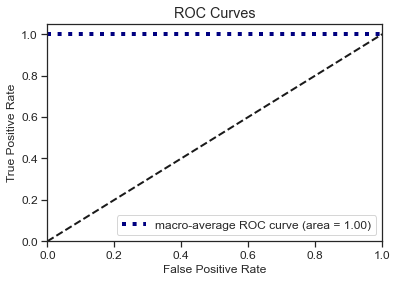

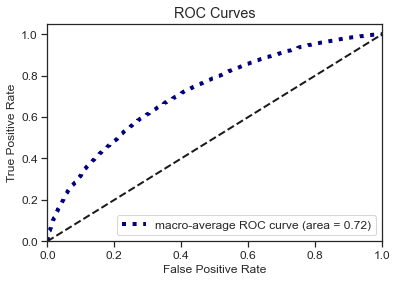

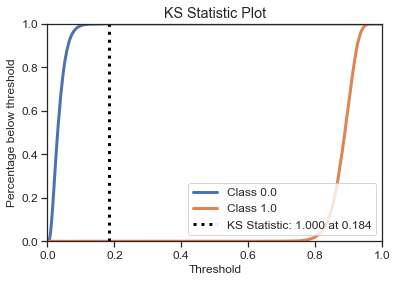

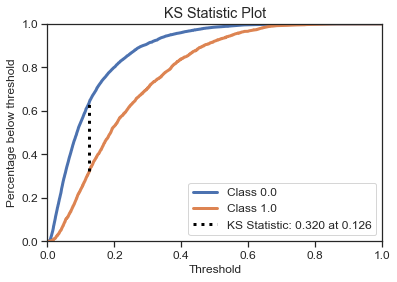

In [151]:
plot_roc_curve(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[vart[0]],curves='macro')
plot_roc_curve(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[vart[0]],curves='macro')

plot_ks_statistic(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[vart[0]])
plot_ks_statistic(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[vart[0]])

In [ ]:
d=pd.DataFrame(modelo.predict_proba(Xt[best]))

In [ ]:
tn, fp, fn, tp = confusion_matrix(yt[vart[0]],modelo.predict(Xt[best])).ravel()

In [ ]:
tn, fp, fn, tp

In [ ]:
confusion_matrix(yt[vart[0]],modelo.predict(Xt[best]))

In [ ]:
confusion_matrix(yv[vart[0]],modelo.predict(Xv[best]))

In [ ]:
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value
        
    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

In [ ]:
yv['proba']=pd.DataFrame(modelo.predict_proba(Xv[best]))[1]

In [ ]:
fpr, tpr, threshold = roc_curve(yv[vart[0]], yv['proba'])

In [ ]:
# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(yv[vart[0]], yv['proba'])


In [ ]:
threshold[0]

In [ ]:
yv['pred']=yv['proba'].map(lambda x: 1 if x > threshold[0] else 0)

In [ ]:
confusion_matrix(yv[vart[0]], yv['pred'])

In [ ]:
confusion_matrix(yt[vart[0]],modelo.predict(Xt[best]))

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = modelo, X = Xt[best], y = yt[vart[0]], cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
accuracies

In [ ]:
plot_roc(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[vart[0]])
plot_roc(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[vart[0]])

plot_ks_statistic(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[vart[0]])
plot_ks_statistic(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[vart[0]])

## Bosque Aleatorio

In [12]:
modelo = RandomForestClassifier()

In [147]:
%%time
modelo.fit(Xt[best],yt[vart[0]])

Wall time: 19.9 s


RandomForestClassifier()

### Área bajo la curva ROC

### Estadístico de KS

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

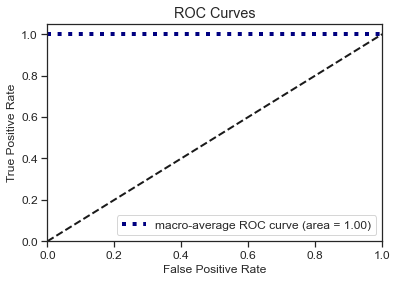

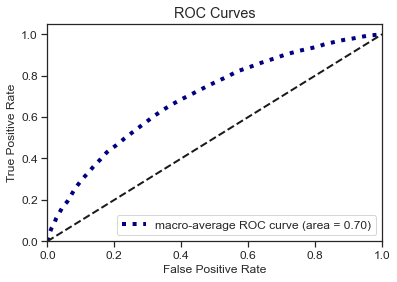

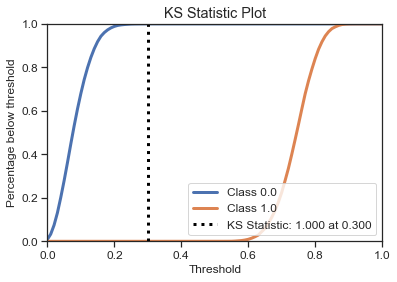

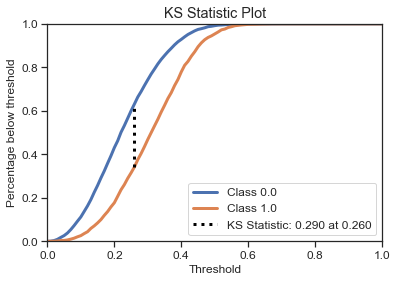

In [148]:
plot_roc_curve(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[vart[0]],curves='macro')
plot_roc_curve(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[vart[0]],curves='macro')

plot_ks_statistic(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[vart[0]])
plot_ks_statistic(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[vart[0]])

### Hiperparametrización

In [ ]:
gradilla_hp = dict(n_estimators = range(10,200,10),
                   criterion = ["gini", "entropy"],
                   max_depth = range(2,10)
                  )

grid = RandomizedSearchCV(cv=5,verbose=True,
                          estimator=modelo,
                          n_jobs=-1,
                          scoring='roc_auc',
                          param_distributions=gradilla_hp,
                          n_iter=50)

grid.fit(Xt[best],yt[vart[0]])

modelo = grid.best_estimator_

print(grid.best_params_)

print(grid.best_score_)

modelo.fit(Xt[best],yt[vart[0]])

### Área bajo la curva ROC

### Estadístico de KS

In [ ]:
plot_roc_curve(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[vart[0]],curves='macro')
plot_roc_curve(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[vart[0]],curves='macro')

plot_ks_statistic(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[vart[0]])
plot_ks_statistic(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[vart[0]])

## Árbol de Decisión

In [138]:
modelo = DecisionTreeClassifier()

In [143]:
modelo.fit(Xt[best],yt[vart[0]])

DecisionTreeClassifier()

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

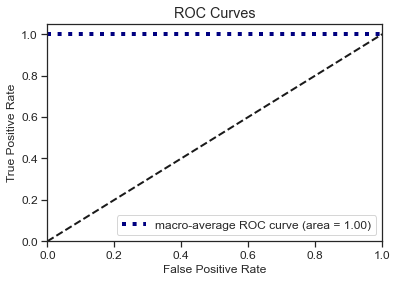

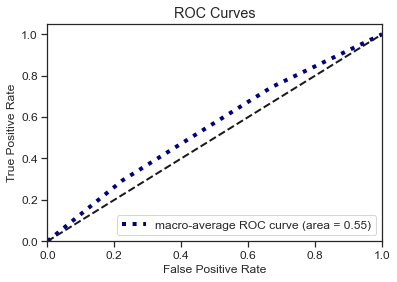

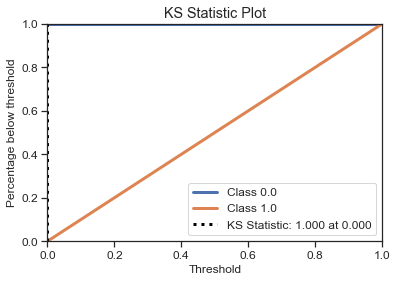

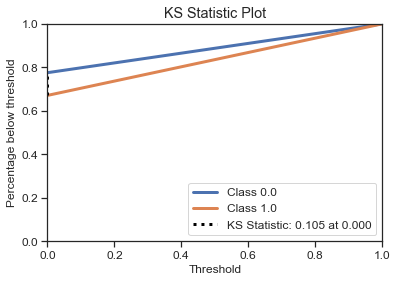

In [142]:
plot_roc_curve(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[vart[0]],curves='macro')
plot_roc_curve(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[vart[0]],curves='macro')

plot_ks_statistic(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[vart[0]])
plot_ks_statistic(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[vart[0]])

### Hiperparametrización

In [144]:
gradilla_hp = dict(
                   criterion = ["gini", "entropy"],
                   max_depth = range(2,50)
                  )

grid = RandomizedSearchCV(cv=4,verbose=True,
                          estimator=modelo,
                          n_jobs=-1,
                          scoring='roc_auc',
                          param_distributions=gradilla_hp,
                          n_iter=200)

grid.fit(Xt[best],yt[vart[0]])

modelo = grid.best_estimator_

print(grid.best_params_)

print(grid.best_score_)

modelo.fit(Xt[best],yt[vart[0]])

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning:

The total space of parameters 96 is smaller than n_iter=200. Running 96 iterations. For exhaustive searches, use GridSearchCV.



Fitting 4 folds for each of 96 candidates, totalling 384 fits
{'max_depth': 6, 'criterion': 'entropy'}
0.6401282543069804


DecisionTreeClassifier(criterion='entropy', max_depth=6)

### Área bajo la curva ROC

### Estadístico de KS

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

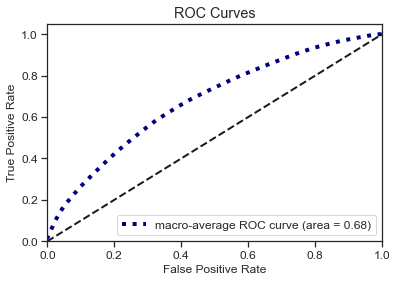

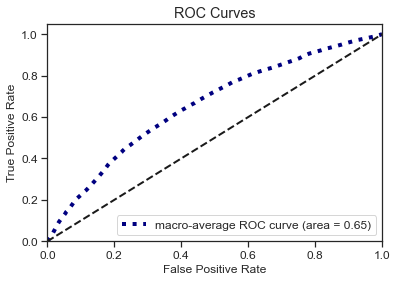

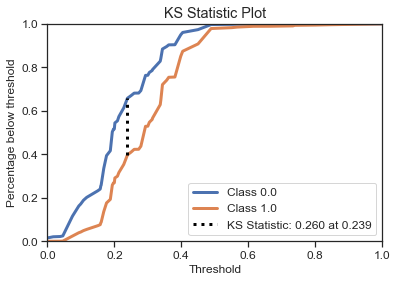

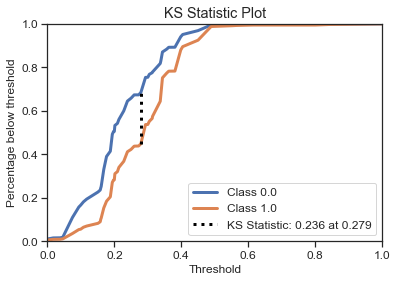

In [145]:
plot_roc_curve(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[vart[0]],curves='macro')
plot_roc_curve(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[vart[0]],curves='macro')

plot_ks_statistic(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[vart[0]])
plot_ks_statistic(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[vart[0]])